In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
import statistics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)

numpy 1.26.4
pandas 2.2.2
sklearn 1.5.1


In [37]:
country_df=pd.read_csv('Country-data.csv')

In [38]:
country_df.shape

(167, 10)

In [39]:
country_df.head(50)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [40]:
country_df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [41]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [42]:
# Data Dictionary

# country : Name of the country
# child_mort : Death of children under 5 years of age per 1000 live births
# exports : Exports of goods and services per capita. Given as %age of the GDP per capita
# health : Total health spending per capita. Given as %age of GDP per capita
# imports : Imports of goods and services per capita. Given as %age of the GDP per capita
# Income : Net income per person
# Inflation : The measurement of the annual growth rate of the Total GDP
# life_expec : The average number of years a new born child would live if the current 
# mortality patterns are to remain the same
# total_fer : The number of children that would be born to each woman if the current age-fertility rates remain the same.
# gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.

In [43]:
#Summary of the numerical columns in the dataframe
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [44]:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [45]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# EDA

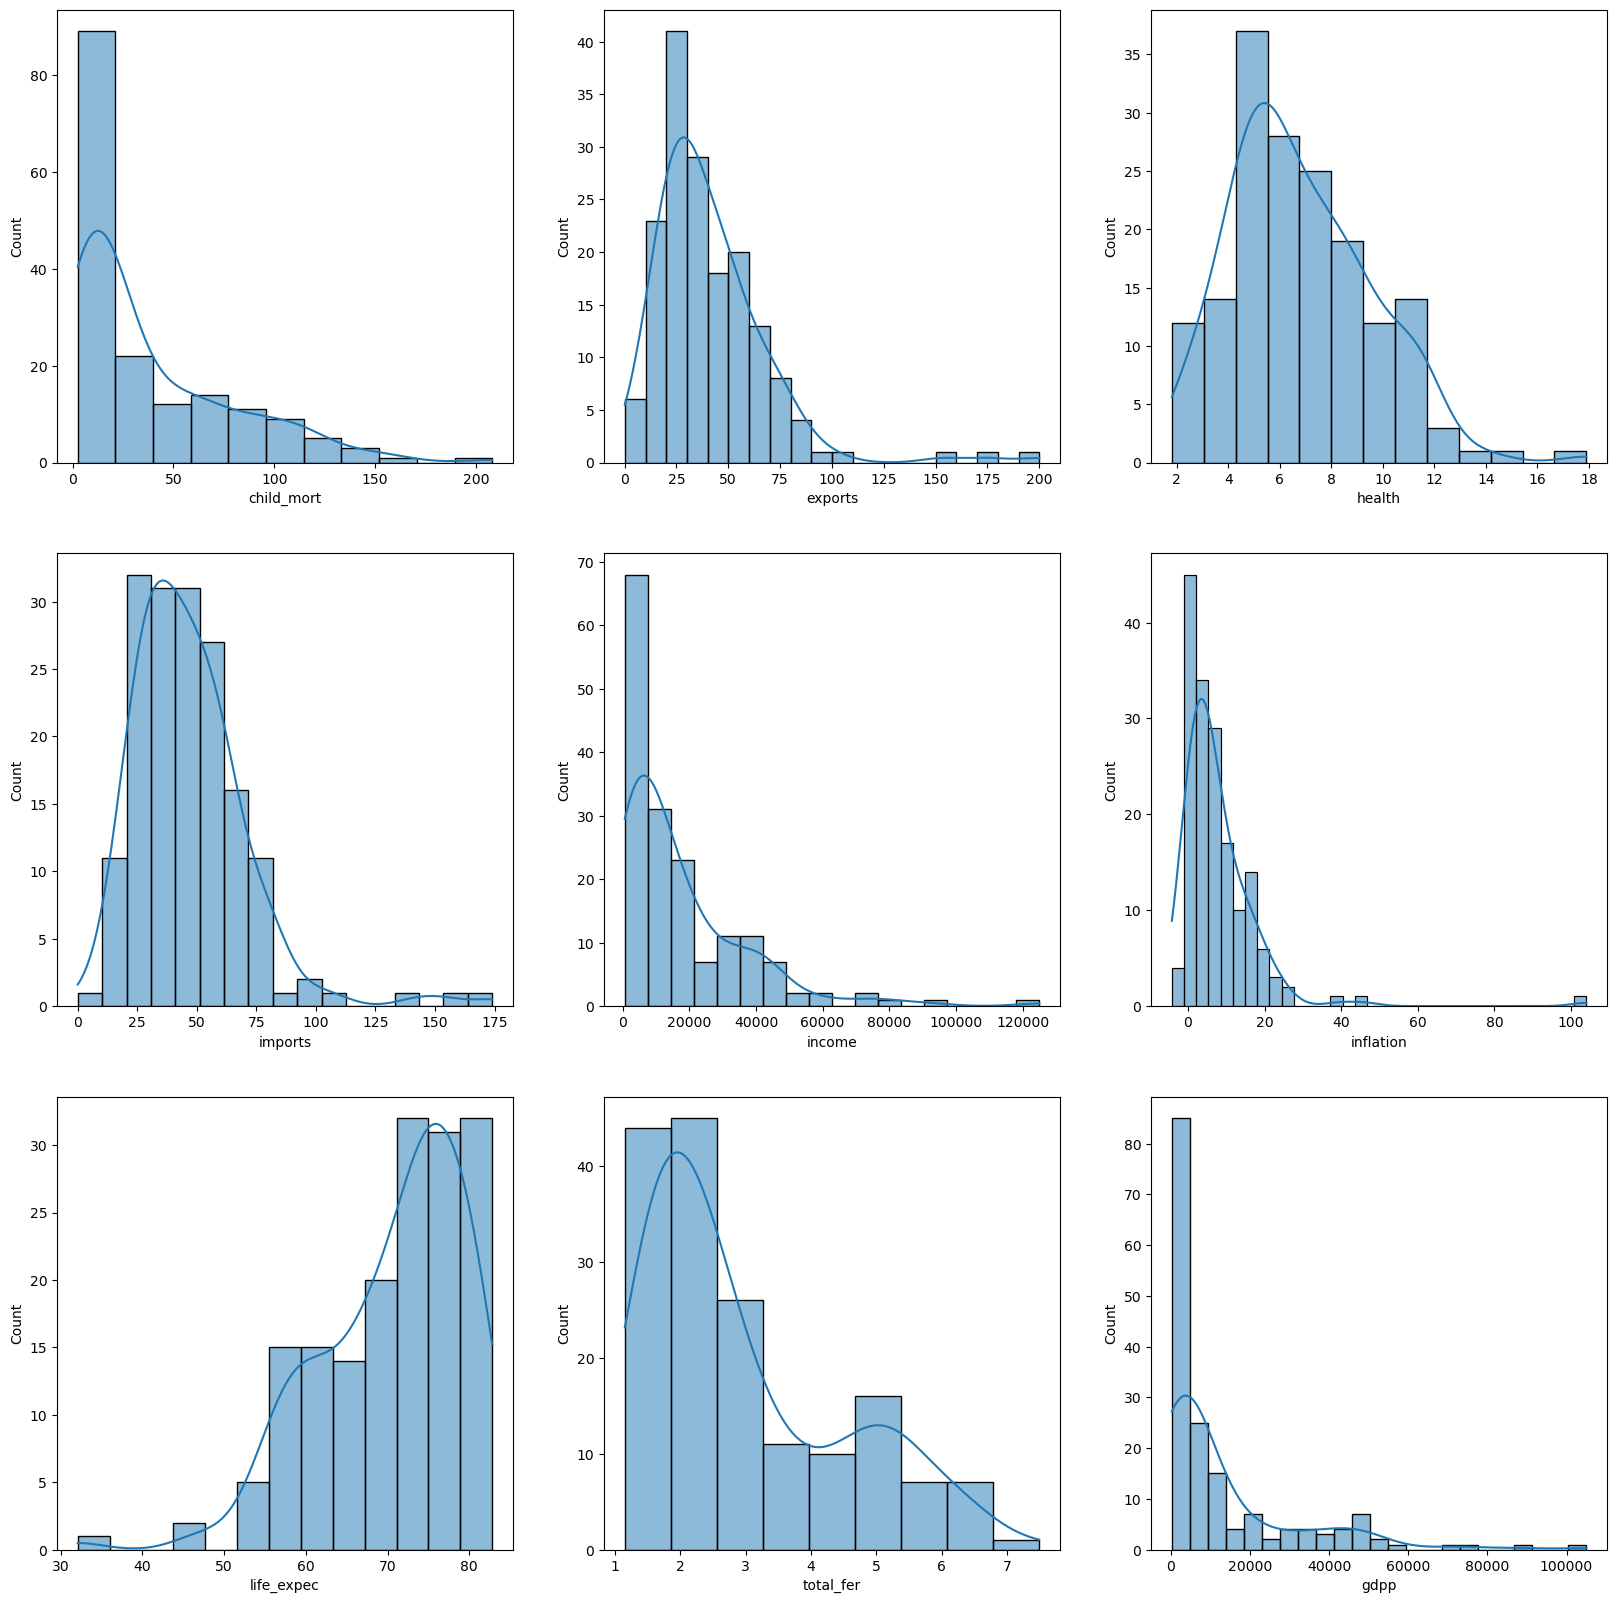

In [46]:
plt.figure(figsize=(20,20))
feat_list=country_df.columns[1:]
for i in enumerate(feat_list):
    plt.subplot(3,3, i[0]+1)
    sns.histplot(country_df[i[1]],kde=True)

##### The above graphs shows the features child_mortality , gdpp , income, total_fer ,life_expec shows are widlely distributed.

In [47]:
for i in enumerate(feat_list):
    print(i)

(0, 'child_mort')
(1, 'exports')
(2, 'health')
(3, 'imports')
(4, 'income')
(5, 'inflation')
(6, 'life_expec')
(7, 'total_fer')
(8, 'gdpp')


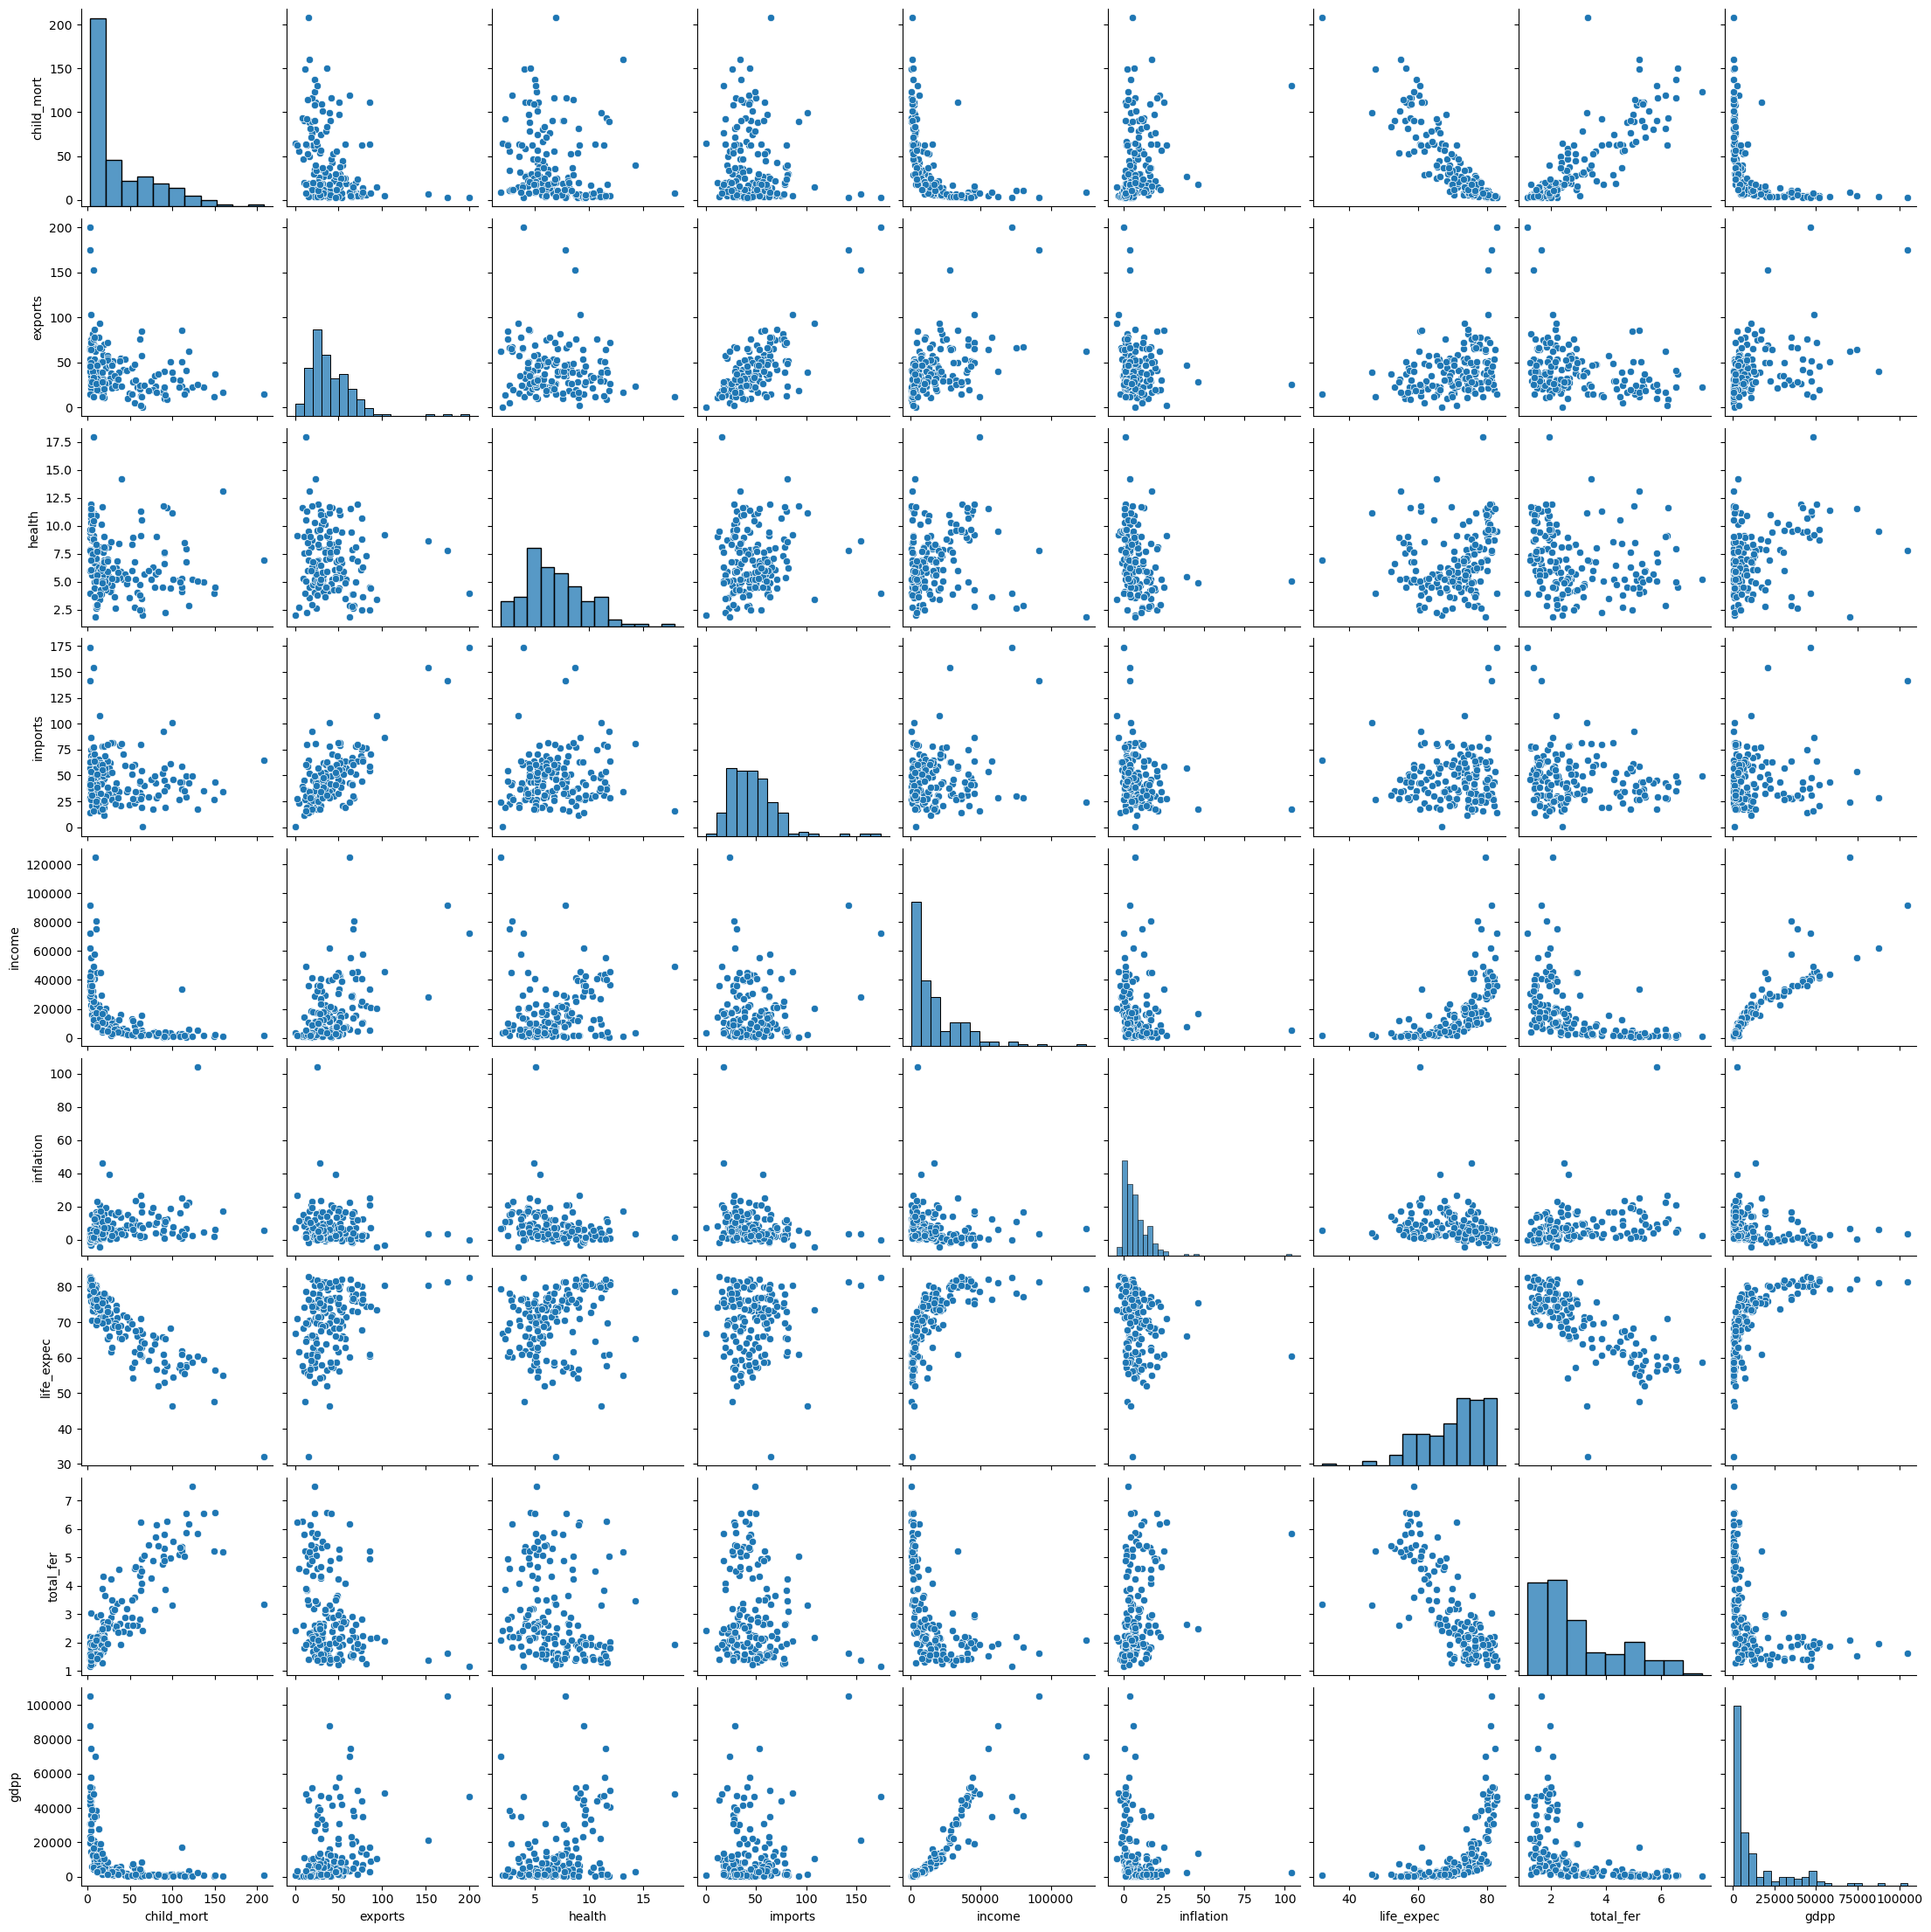

In [48]:
num_data=country_df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]
sns.pairplot(num_data)
plt.show()

# Outlier Analysis

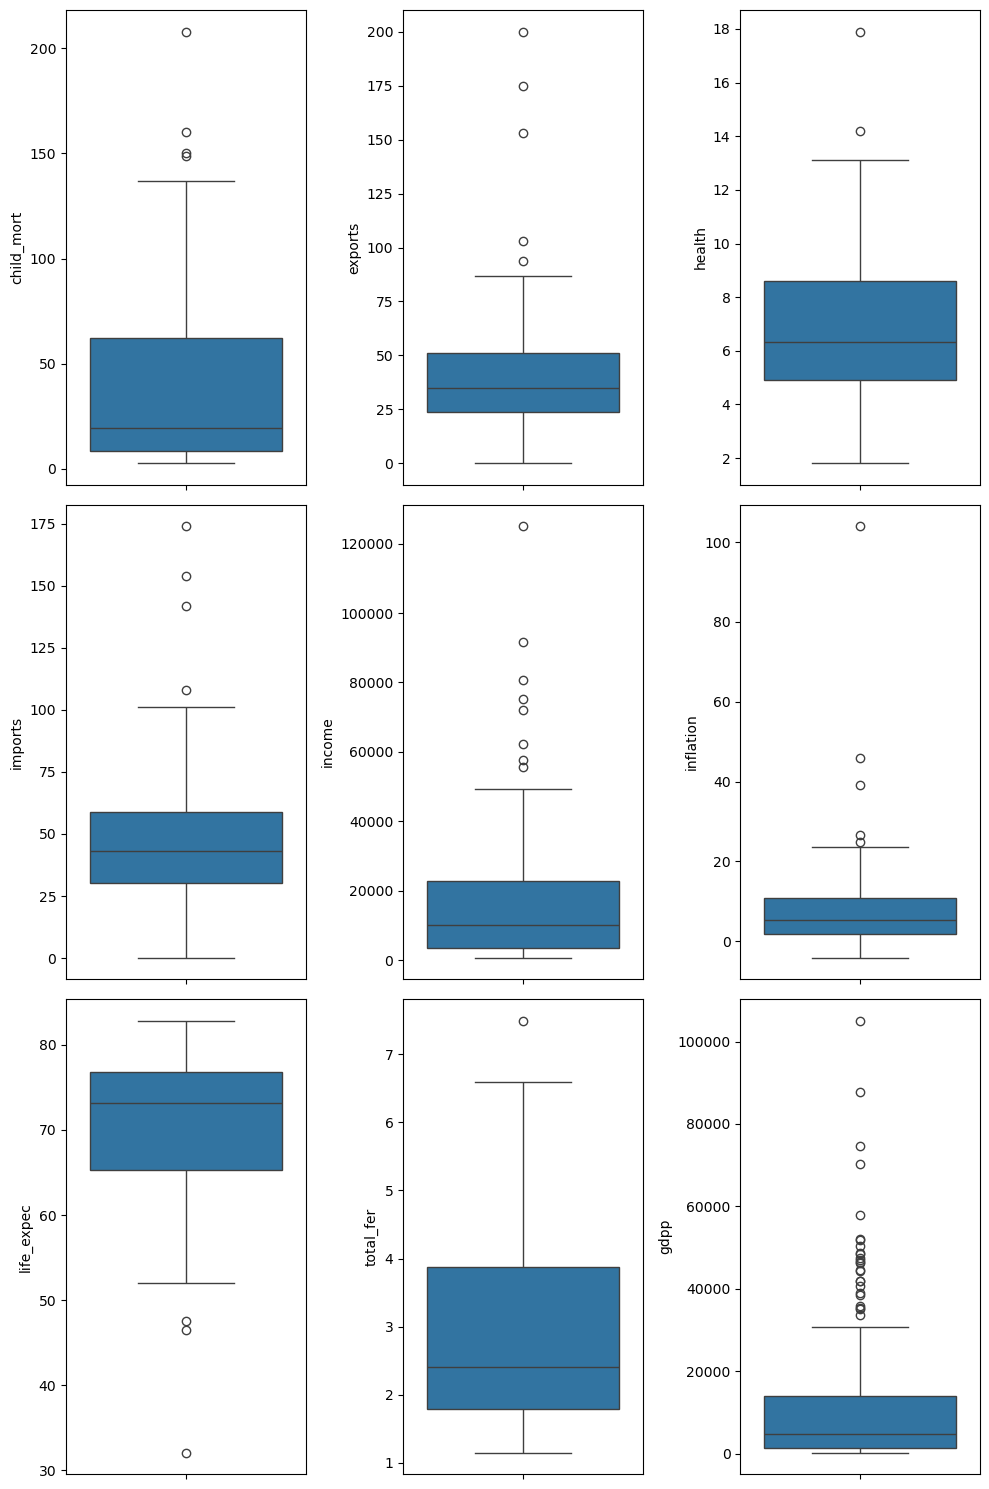

In [49]:
plt.figure(figsize=(10, 15))   # Adjust width & height
feat_list = country_df.columns[1:]

for i, col in enumerate(feat_list):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=country_df[col])

plt.tight_layout()   # Prevent overlap
plt.show()

#### Observation: We find that all the features have outliers. We need to handle them expect the outliers which are in higher range of child mortality and lower range in gdpp and income. As there factors help us in cluster profiling as the countries if these three characterstics may require the funding more.

#### As the data which is provided is less we chose not to delete any outliers and instead we use capping method

In [50]:
#Handling the outliers
# calculating in arbitary way. its is usually based on business
# removing (statistical) outliers
# 1st and 95th percentile levels

# outlier treatment for child_mort
Q1 = country_df.child_mort.quantile(0.01)
Q3 = country_df.child_mort.quantile(0.95)
country_df['child_mort'] = country_df['child_mort'].clip(lower=Q1, upper=Q3)

# outlier treatment for exports
Q1 = country_df.exports.quantile(0.01)
Q3 = country_df.exports.quantile(0.95)
country_df['exports'] = country_df['exports'].clip(lower=Q1, upper=Q3)


# outlier treatment for health
Q1 = country_df.health.quantile(0.01)
Q3 = country_df.health.quantile(0.95)
country_df['health'] = country_df['health'].clip(lower=Q1, upper=Q3)


# outlier treatment for imports
Q1 = country_df.imports.quantile(0.01)
Q3 = country_df.imports.quantile(0.95)
country_df['imports'] = country_df['imports'].clip(lower=Q1, upper=Q3)

# outlier treatment for income
Q1 = country_df.income.quantile(0.01)
Q3 = country_df.income.quantile(0.95)
country_df['income'] = country_df['income'].clip(lower=Q1, upper=Q3)

# outlier treatment for inflation
Q1 = country_df.inflation.quantile(0.01)
Q3 = country_df.inflation.quantile(0.95)
country_df['inflation'] = country_df['inflation'].clip(lower=Q1, upper=Q3)

# outlier treatment for life_expec
Q1 = country_df.life_expec.quantile(0.01)
Q3 = country_df.life_expec.quantile(0.95)
country_df['life_expec'] = country_df['life_expec'].clip(lower=Q1, upper=Q3)

# outlier treatment for total_fer
Q1 = country_df.total_fer.quantile(0.01)
Q3 = country_df.total_fer.quantile(0.95)
country_df['total_fer'] = country_df['total_fer'].clip(lower=Q1, upper=Q3)

# outlier treatment for gdpp
Q1 = country_df.gdpp.quantile(0.01)
Q3 = country_df.gdpp.quantile(0.95)
country_df['gdpp'] = country_df['gdpp'].clip(lower=Q1, upper=Q3)

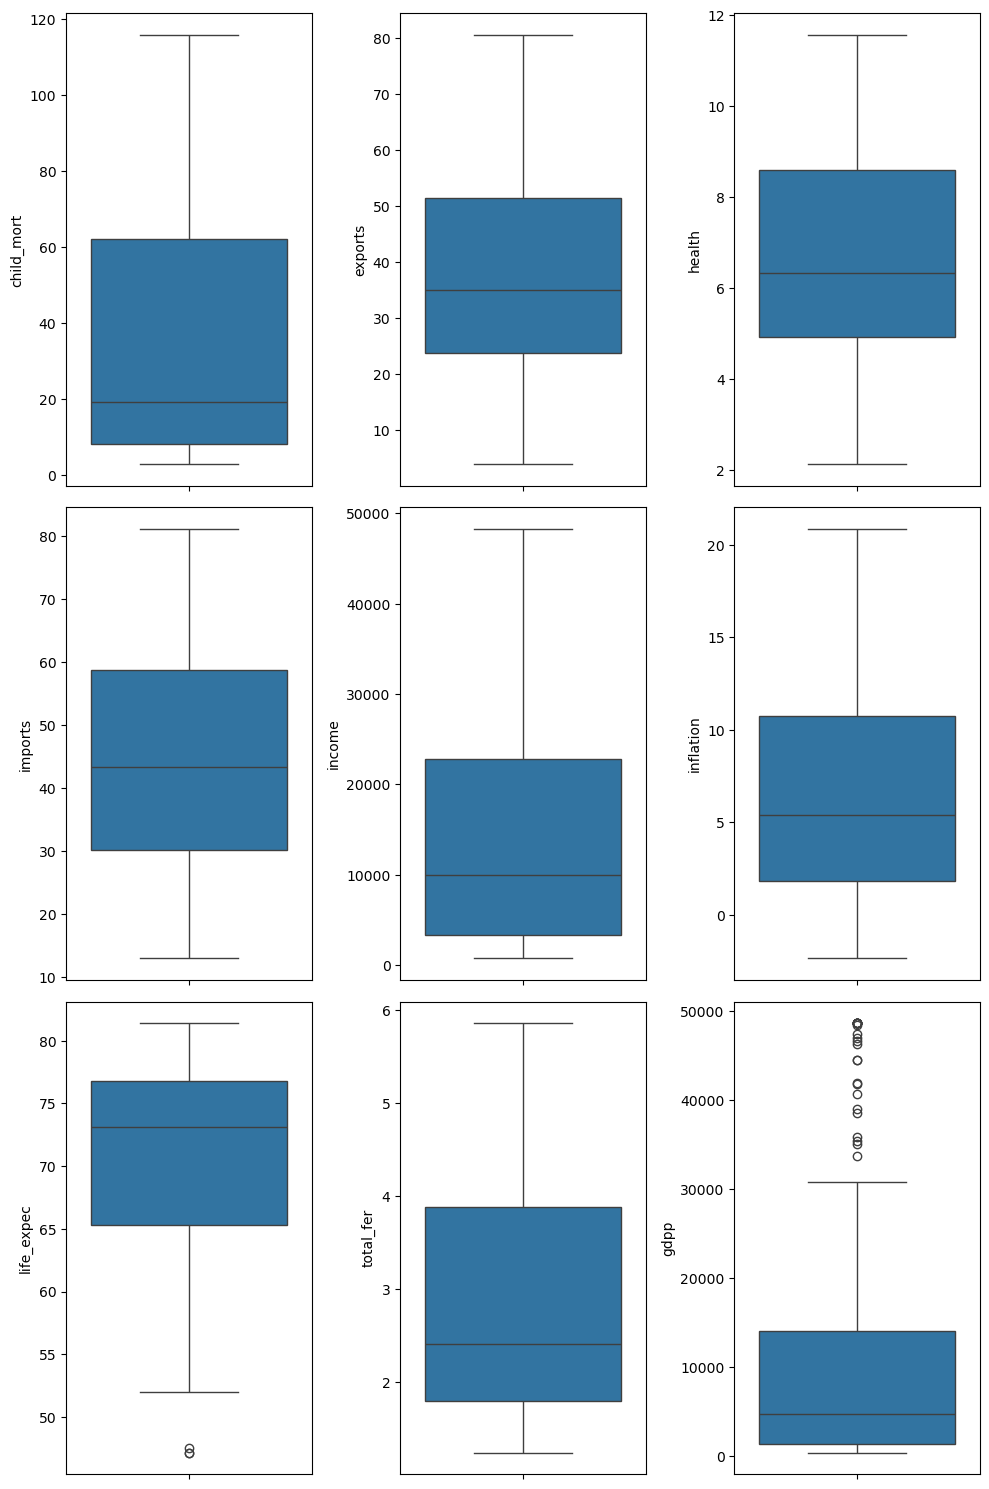

In [51]:
plt.figure(figsize=(10, 15))   # Adjust width & height
feat_list = country_df.columns[1:]

for i, col in enumerate(feat_list):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=country_df[col])

plt.tight_layout()   # Prevent overlap
plt.show()

In [52]:
country_df.head(50)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.900,1610.00,9.440,56.2,5.820,553.00
1,Albania,16.6,28.00,6.55,48.600,9930.00,4.490,76.3,1.650,4090.00
2,Algeria,27.3,38.40,4.17,31.400,12900.00,16.100,76.5,2.890,4460.00
3,Angola,116.0,62.30,2.85,42.900,5900.00,20.870,60.1,5.861,3530.00
4,Antigua and Barbuda,10.3,45.50,6.03,58.900,19100.00,1.440,76.8,2.130,12200.00
5,Argentina,14.5,18.90,8.10,16.000,18700.00,20.870,75.8,2.370,10300.00
6,Armenia,18.1,20.80,4.40,45.300,6700.00,7.770,73.3,1.690,3220.00
7,Australia,4.8,19.80,8.73,20.900,41400.00,1.160,81.4,1.930,48610.00
8,Austria,4.3,51.30,11.00,47.800,43200.00,0.873,80.5,1.440,46900.00
9,Azerbaijan,39.2,54.30,5.88,20.700,16000.00,13.800,69.1,1.920,5840.00


In [53]:
scaler = StandardScaler()
country_df1 = scaler.fit_transform(country_df.drop('country', axis = 1))
country_df1

array([[ 1.47935397, -1.44612345,  0.3255513 , ..., -1.69795489,
         2.01704277, -0.75742787],
       [-0.55908007, -0.55193404, -0.07804893, ...,  0.66942946,
        -0.88144278, -0.52337969],
       [-0.26273165, -0.03529127, -1.01063975, ...,  0.69298553,
        -0.019543  , -0.49889627],
       ...,
       [-0.3735161 ,  1.63386229,  0.03558609, ...,  0.29253245,
        -0.67291864, -0.70733614],
       [ 0.54045568, -0.45257966, -0.61487642, ..., -0.36703732,
         1.21770023, -0.70733614],
       [ 1.28271155, -0.10483934, -0.33666655, ..., -2.19263222,
         1.72510897, -0.69741043]])

In [54]:
country_df1 = pd.DataFrame(country_df1, columns = country_df.columns[1:])
country_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479354,-1.446123,0.325551,-0.018084,-0.958490,0.393469,-1.697955,2.017043,-0.757428
1,-0.559080,-0.551934,-0.078049,0.182396,-0.394106,-0.387374,0.669429,-0.881443,-0.523380
2,-0.262732,-0.035291,-1.010640,-0.749563,-0.192637,1.444058,0.692986,-0.019543,-0.498896
3,2.193914,1.151994,-1.527875,-0.126451,-0.667480,2.196506,-1.238612,2.045541,-0.560436
4,-0.733566,0.317417,-0.281808,0.740488,0.227937,-0.868499,0.728320,-0.547804,0.013270


##### Hopkins stats: 
##### The Hopkins statistic (Lawson and Jurs 1990) is used to assess the clustering tendency of a data set by measuring the probability that a given data set is generated by a uniform data distribution. In other words, it tests the spatial randomness of the data. we need to pass a dataframe to the Hopkins statistic function to find if the dataset is suitable for clustering or not. On multiple iterations of Hopkins Statistic, we will be getting multiple values since the algorithm uses some randomisation in the initialisation part of the code. Therefore we need to run it a couple of times before confirming whether the data is suitable for clustering or not. If the value of Hopkins statistic is close to 1, then we can reject the null hypothesis and conclude that the dataset D is significantly a clusterable data

In [55]:
def hopkins(X):
    m = X.shape[1]       # columns
    n = X.shape[0]       # rows
    d = int(0.1 * n)     # 10 percent of the rows
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), d)
     
    ujd = []
    wjd = []
    for j in range(0, d):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),m).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [56]:
hopkins(country_df1)

0.755955175472012

In [57]:
#running the hopkins statistics for abunt 10 times and finding the avg :
#As hopkins stat value changes everytime we run the code. So i prefer to take the avg 
#if them and then see the score.
hop_list=[]
for i in range(0,9):
    hop_list.append(hopkins(country_df1))
hop_list

[0.7057116360525048,
 0.7152802431883623,
 0.7114422593796134,
 0.7227615175734765,
 0.7210685057385597,
 0.721231360937411,
 0.7568124869034316,
 0.7227011750572012,
 0.7514076695548026]

In [58]:
statistics.mean(hop_list) 

0.7253796504872626

# SSD/ Elbow curve

In [59]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

In [60]:
# elbow-curve/SSD
#Finding the Optimal Number of Clusters
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df1)
    
    ssd.append(kmeans.inertia_)

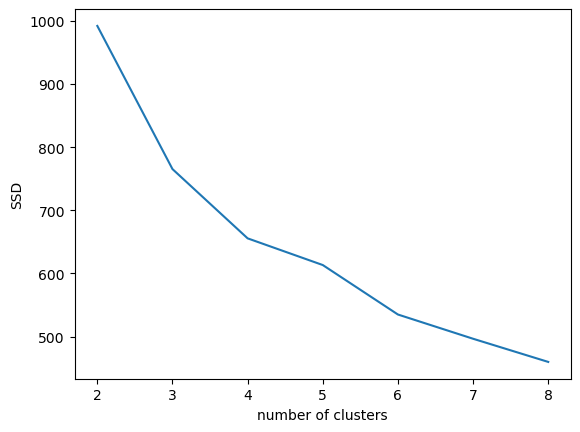

In [61]:
# plot the SSDs for each n_clusters
plt.xlabel("number of clusters")
plt.ylabel("SSD")
plt.plot(range_n_clusters,ssd)
plt.show()

##### The above graph shows that cluster size 3 is optimal. ssd is sum of square distances to individual samples to the nearest clusters. as n of clusters increases ssd will decrease. we need to find does it goes down enough to add one cluster from 3 to 4 slope reduces. so the drop is not the significant. So optimal value is 3.

## Silhouette Analysis

##### silhouette score=(p−q)/max(p,q)

##### p is the mean distance to the points in the nearest cluster that the data point is not a part of . So this must be high

##### q is the mean intra-cluster distance to all the points in its own cluster and this must be low

##### The value of the silhouette score range lies between -1 to 1.

##### A score closer to 1 indicates that the data point is very similar to other data points in the cluster, and dissimilar to other points of other clusters. Very good cluster

##### A score closer to -1 indicates that the data point is not similar to the data points in its cluster. and similar to other points of other clusters. Not that good cluster

In [62]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.28267862253629855
For n_clusters=3, the silhouette score is 0.2725648361437878
For n_clusters=4, the silhouette score is 0.25155289195501
For n_clusters=5, the silhouette score is 0.23001461372636514
For n_clusters=6, the silhouette score is 0.23945138463499877
For n_clusters=7, the silhouette score is 0.2627619623323452
For n_clusters=8, the silhouette score is 0.23000617380481123


Text(0, 0.5, 'silhouette_score')

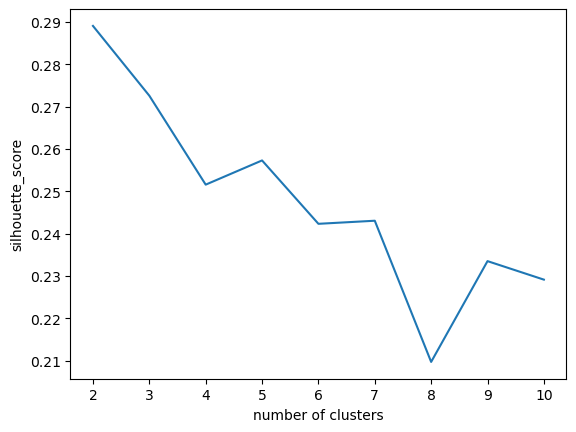

In [63]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_df1)
    ss.append([k, silhouette_score(country_df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])
plt.xlabel("number of clusters")
plt.ylabel("silhouette_score")

##### The graph and the silhouette_score shows that k=2 or k=3 are optimal values and can be used as number of clusters. So based on the elbow curver and sihouette score we come to a conclusion that k=3 is the optimal value of k

In [64]:
# Kmean Clustering with k=3

kmeans = KMeans(n_clusters=3,random_state=50,max_iter=50)
kmeans.fit(country_df1)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [65]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [66]:
# assign the lcluster label
country_df['cluster_id'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.820,553.0,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0,1
3,Angola,116.0,62.3,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0,1


In [32]:
#Count of number of countires under each cluster
country_df.cluster_id.value_counts()

cluster_id
1    77
2    51
0    39
Name: count, dtype: int64

In [68]:
country_df.to_csv('clusterd_df_kmeans.csv',index=False)

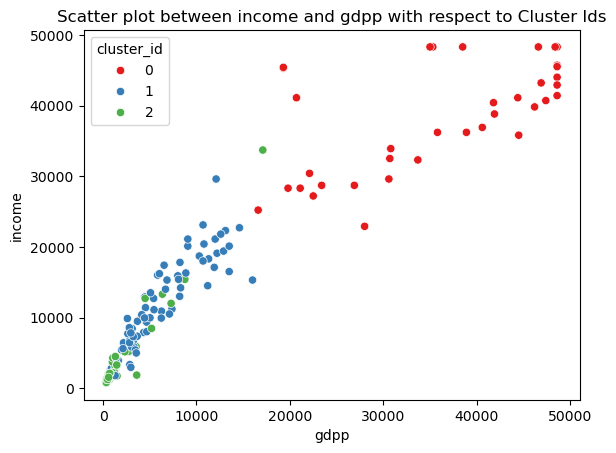

In [69]:
#scatter plot between income and gdpp with respect to Cluster Ids
sns.scatterplot(x='gdpp',y='income',hue='cluster_id',data=country_df,palette='Set1')
plt.title("Scatter plot between income and gdpp with respect to Cluster Ids")
plt.show()

##### Observation : Cluster 2 has to be targeted as it is low in income and gdpp.

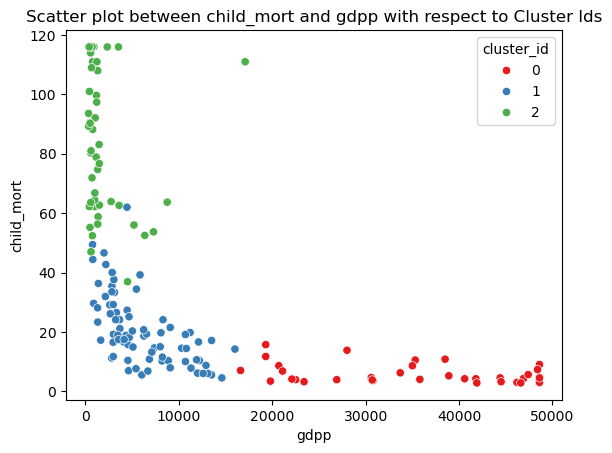

In [70]:
#scatter plot between child_mort and gdpp with respect to Cluster Ids
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_id',data=country_df,palette='Set1')
plt.title("Scatter plot between child_mort and gdpp with respect to Cluster Ids")
plt.show()

##### Observation: The above graph also depicts that Cluster 2 are the target countries to get the AID as it has less gdpp and high child_mortality rate

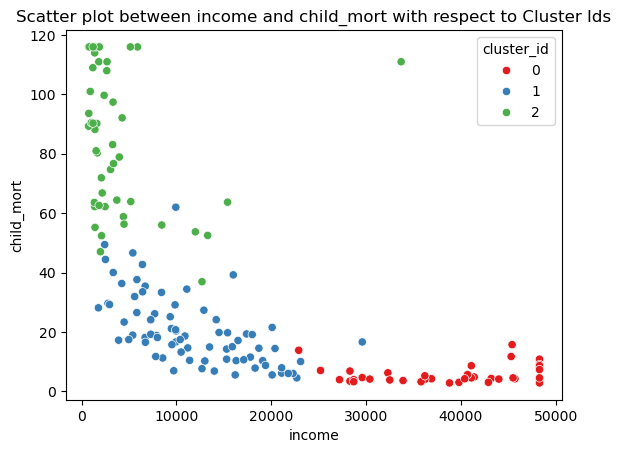

In [71]:
#scatter plot between income and child_mort with respect to Cluster Ids
sns.scatterplot(x='income',y='child_mort',hue='cluster_id',data=country_df,palette='Set1')
plt.title("Scatter plot between income and child_mort with respect to Cluster Ids")
plt.show()

##### Observation: The above graph also depicts that Cluster 2 are the target countries to get the AID as it has less income and high child_mortality rate

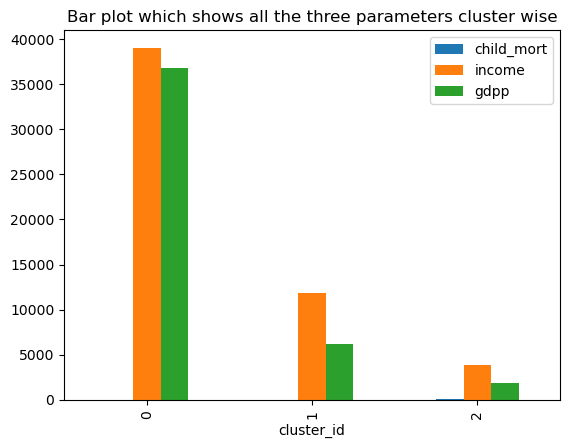

In [72]:
#Bar plot which shows all the three parameters cluster wise
country_df.drop(columns=['country','exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer']).groupby('cluster_id').mean().plot(kind = 'bar')
plt.title("Bar plot which shows all the three parameters cluster wise")
plt.show()

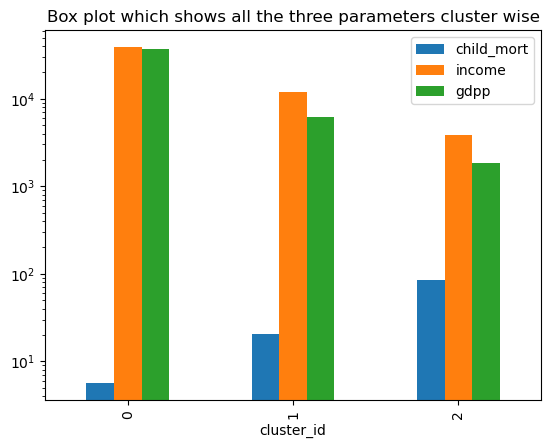

In [73]:
country_df.drop(['country','exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')
plt.title("Box plot which shows all the three parameters cluster wise")
plt.yscale("log")
plt.show()

##### Observation:

#####    Cluster 0: Less Child mortality rate, high gdpp and income : Developed countries.

#####     Cluster 1: Medium child mortality rate, gdpp and income : Developing countries.

#####    Cluster 2: High Child mortality rate, less gdpp and income : Under developed countries. Which we need to target

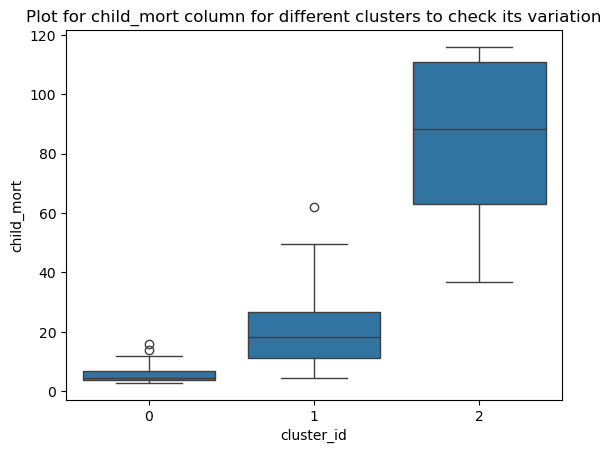

In [74]:
# plot for child_mort column for different clusters to check its variation
sns.boxplot(x='cluster_id', y='child_mort', data=country_df)
plt.title("Plot for child_mort column for different clusters to check its variation")
plt.show()

##### Observation: The cluster 0 has countries with less child mortality and cluster 2 has countries with high child mortality.

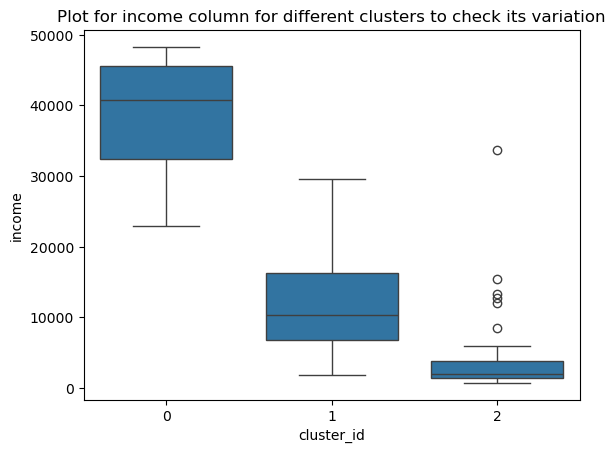

In [75]:
# plot for income column for different clusters to check its variation
sns.boxplot(x='cluster_id', y='income', data=country_df)
plt.title("Plot for income column for different clusters to check its variation")
plt.show()

##### Observation: The cluster 0 has countries with high income and cluster 2 has countries with less income.

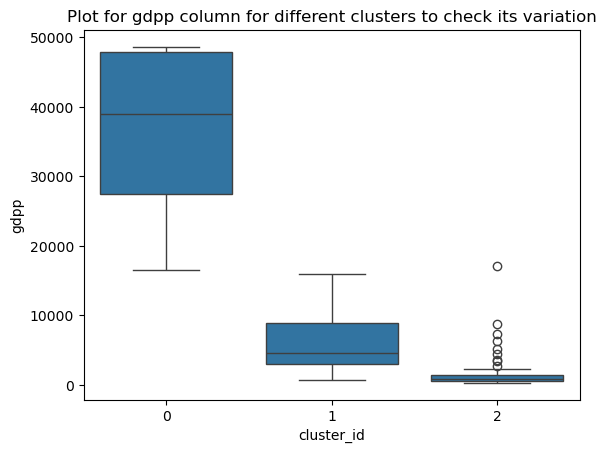

In [76]:
# plot for gdpp column for different clusters to check its variation
sns.boxplot(x='cluster_id', y='gdpp', data=country_df)
plt.title("Plot for gdpp column for different clusters to check its variation")
plt.show()

##### Observation: The cluster 0 has countries with high gdpp and cluster 2 has countries with low gdpp.

##### Observation:

##### Cluster 0: Less Child mortality rate, high gdpp and income : Developed countries.
##### Cluster 1: Medium child mortality rate, gdpp and income : Developing countries.
##### Cluster 2: High Child mortality rate, less gdpp and income : Under developed countries. Which we need to target

In [77]:
#Countries under Cluster 2 ie. which have less gdpp, less income and high child mortality
country_df[country_df['cluster_id'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0000,7.5800,44.900,1610.00,9.440,56.20,5.820,553.00,2
3,Angola,116.0,62.3000,2.8500,42.900,5900.00,20.870,60.10,5.861,3530.00,2
17,Benin,111.0,23.8000,4.1000,37.200,1820.00,0.885,61.80,5.360,758.00,2
21,Botswana,52.5,43.6000,8.3000,51.300,13300.00,8.920,57.10,2.880,6350.00,2
25,Burkina Faso,116.0,19.2000,6.7400,29.600,1430.00,6.810,57.90,5.861,575.00,2
26,Burundi,93.6,8.9200,11.5700,39.200,764.00,12.300,57.70,5.861,331.62,2
28,Cameroon,108.0,22.2000,5.1300,27.000,2660.00,1.910,57.30,5.110,1310.00,2
31,Central African Republic,116.0,11.8000,3.9800,26.500,888.00,2.010,47.50,5.210,446.00,2
32,Chad,116.0,36.8000,4.5300,43.500,1930.00,6.390,56.50,5.861,897.00,2
36,Comoros,88.2,16.5000,4.5100,51.700,1410.00,3.870,65.90,4.750,769.00,2


In [78]:
country_df['country'][country_df['cluster_id'] == 2].count()

51

In [79]:
#Countries under Cluster 0 ie. which have medium gdpp, medium income and medium child mortality
country_df[country_df['cluster_id'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
7,Australia,4.8,19.80,8.7300,20.90,41400.0,1.1600,81.4,1.9300,48610.0,0
8,Austria,4.3,51.30,11.0000,47.80,43200.0,0.8730,80.5,1.4400,46900.0,0
10,Bahamas,13.8,35.00,7.8900,43.70,22900.0,-0.3930,73.8,1.8600,28000.0,0
11,Bahrain,8.6,69.50,4.9700,50.90,41100.0,7.4400,76.0,2.1600,20700.0,0
15,Belgium,4.5,76.40,10.7000,74.70,41100.0,1.8800,80.0,1.8600,44400.0,0
23,Brunei,10.5,67.40,2.8400,28.00,48290.0,16.7000,77.1,1.8400,35300.0,0
29,Canada,5.6,29.10,11.3000,31.00,40700.0,2.8700,81.3,1.6300,47400.0,0
42,Cyprus,3.6,50.20,5.9700,57.50,33900.0,2.0100,79.9,1.4200,30800.0,0
43,Czech Republic,3.4,66.00,7.8800,62.90,28300.0,-1.4300,77.5,1.5100,19800.0,0
44,Denmark,4.1,50.50,11.4000,43.60,44000.0,3.2200,79.5,1.8700,48610.0,0


In [80]:
#Countries under Cluster 1 ie. which have high gdpp, high income and low child mortality
country_df[country_df['cluster_id'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1
5,Argentina,14.5,18.9,8.10,16.0,18700.0,20.87,75.8,2.37,10300.0,1
6,Armenia,18.1,20.8,4.40,45.3,6700.0,7.77,73.3,1.69,3220.0,1
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100.0,4.91,76.4,2.08,11900.0,1
161,Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0,1
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,1
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,20.87,75.4,2.47,13500.0,1


In [81]:
#Get the top 5 countires that are in dire need of HELP - When Gdpp, Income and Child mortality is the order of preference.)
country_df[country_df['cluster_id'] == 2].sort_values(by = ['gdpp','income','child_mort'], ascending = [True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,19.10,11.57,81.14,742.24,5.47,60.8,5.020,331.62,2
26,Burundi,93.6,8.92,11.57,39.20,764.00,12.30,57.7,5.861,331.62,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.60,742.24,20.80,57.5,5.861,334.00,2
112,Niger,116.0,22.20,5.16,49.10,814.00,2.55,58.8,5.861,348.00,2
132,Sierra Leone,116.0,16.80,11.57,34.50,1220.00,17.20,55.0,5.200,399.00,2


In [82]:
#Get the top 5 countires that are in dire need of HELP - When 'income','gdpp','child_mort is the order of preference)
country_df[country_df['cluster_id'] == 2].sort_values(by = ['income','gdpp','child_mort'], ascending = [True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,19.10,11.57,81.14,742.24,5.47,60.8,5.020,331.62,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.60,742.24,20.80,57.5,5.861,334.00,2
26,Burundi,93.6,8.92,11.57,39.20,764.00,12.30,57.7,5.861,331.62,2
112,Niger,116.0,22.20,5.16,49.10,814.00,2.55,58.8,5.861,348.00,2
31,Central African Republic,116.0,11.80,3.98,26.50,888.00,2.01,47.5,5.210,446.00,2


In [83]:
#Get the top 5 countires that are in dire need of HELP - When 'child_mort','income','gdpp' is the order of preference)
country_df[country_df['cluster_id'] == 2].sort_values(by = ['child_mort','income','gdpp'], ascending = [False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,742.24,20.80,57.5,5.861,334.0,2
112,Niger,116.0,22.2,5.16,49.1,814.00,2.55,58.8,5.861,348.0,2
31,Central African Republic,116.0,11.8,3.98,26.5,888.00,2.01,47.5,5.210,446.0,2
132,Sierra Leone,116.0,16.8,11.57,34.5,1220.00,17.20,55.0,5.200,399.0,2
25,Burkina Faso,116.0,19.2,6.74,29.6,1430.00,6.81,57.9,5.861,575.0,2


##### Inference:

##### Less gdpp,less income and high child mortality parameters are considered.

##### Five countries which are in direst need of aid - Liberia ,Burundi, Congo. Dem. Rep , Niger , Sierra Leone (When Gdpp, Income and Child mortality is the order of preference.)
##### Five countries which are in direst need of aid - Liberia ,Congo. Dem. Rep, Burundi, Niger , Central African Republic (When 'income','gdpp','child_mort is the order of preference)
##### Five countries which are in direst need of aid - Congo. Dem. Rep, Niger , Central African Republic, Sierra Leone ,Burkina Faso (When 'child_mort','income','gdpp' is the order of preference)
##### Final Inference which can be given to the business : Top five countries that need AID is Liberia ,Burundi, Congo. Dem. Rep , Niger , Sierra Leone (When Gdpp, Income and Child mortality is the order of preference.

##### Reason to sort it according to this order is
##### 1. Gross Domestic Product of a country indicates the total value of production of goods and services of that country and thus indicates that the above five countries have the least production happening in their country. This in turn would lead to the need of requiring external support from other countries. When the financial help is provided to the countries based on the low GDP indicator, such countries should be able to produce more goods and services, which in turn helps in the countries overall development.
##### 2. Low Income is a sign of the inability to purchase commodities or services which can keep a family comfortable or in dire need of resources in case of very low income families. As such, foreign help would provide the required help to such families at a lower cost.
##### 3. Child mortality rate can be the third indicator as it is not directly linked to the resources available, as it is affected to other reasons like incomplete care of the mother during pregnancy, irresponsibility of the health care workers, etc. Thus, child moratlity rate can be considered as the third factor in this problem, keeping in mind the malnutrition and other financial problems the country is facing.

## Hierarchical Clustering

In [84]:
country_df_hierarchy = country_df.copy()
country_df_hierarchy=country_df_hierarchy.drop(['cluster_id'],axis=1)

In [85]:
country_df_hierarchy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.820,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0
3,Angola,116.0,62.3,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0


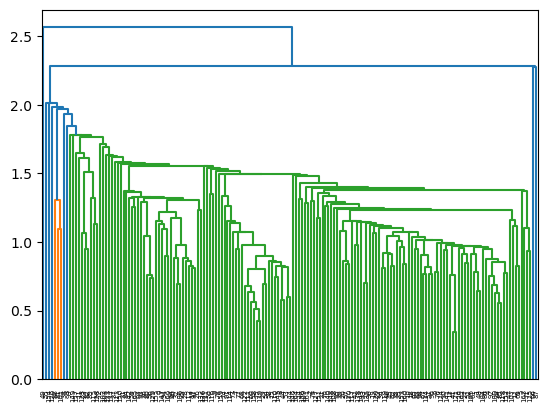

In [86]:
# single linkage - performing on scaled df
mergings = linkage(country_df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

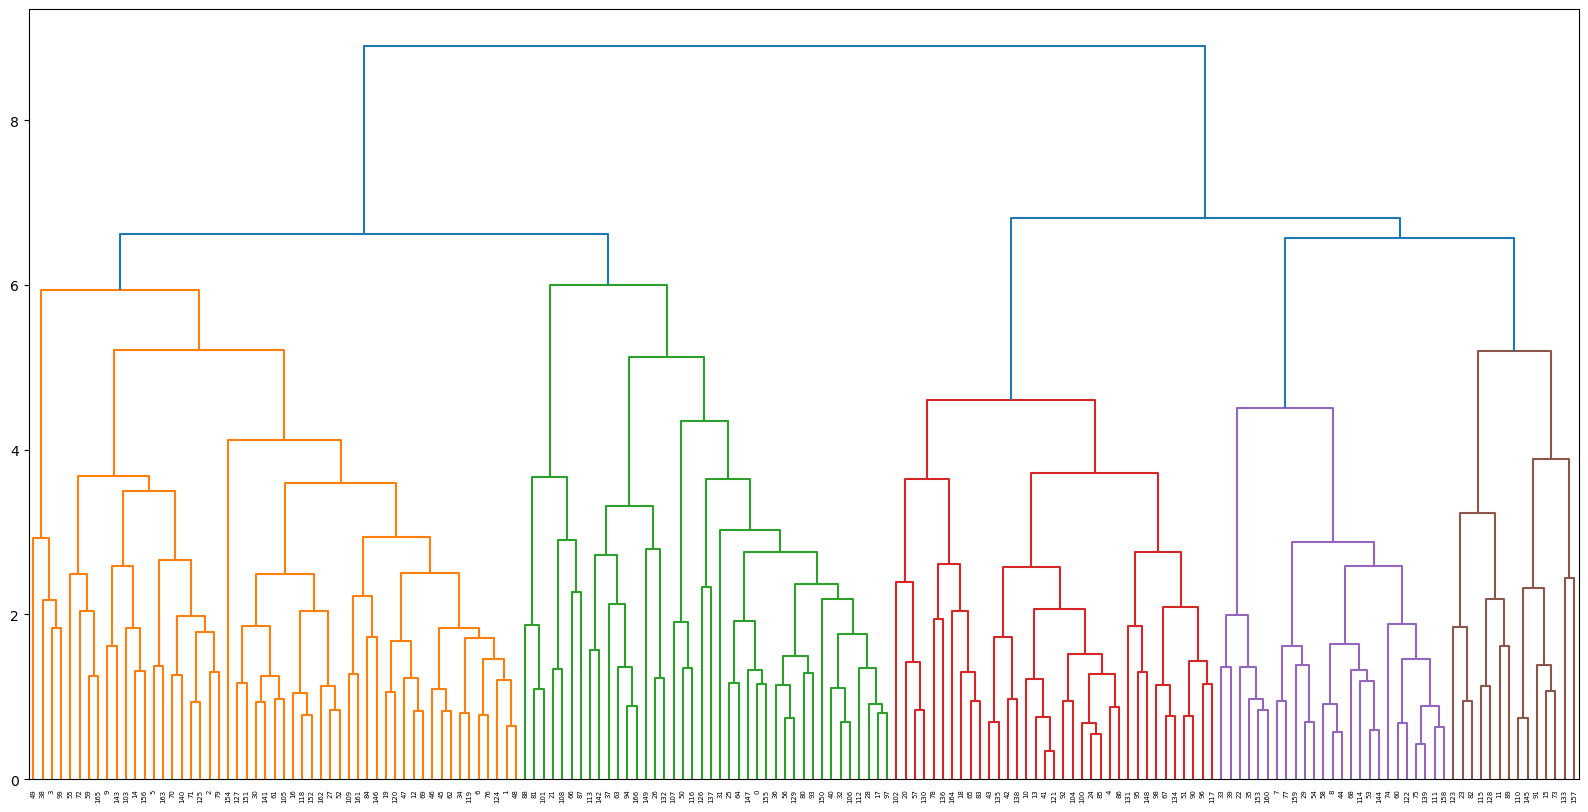

In [87]:
# complete linkage
plt.figure(figsize=(20,10))
mergings = linkage(country_df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [88]:
# Hierarical Clustering using 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1,
       0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0], dtype=int64)

In [89]:
# assign cluster labels
country_df_hierarchy['cluster_labels'] = cluster_labels

In [90]:
country_df_hierarchy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0,0
3,Angola,116.0,62.3,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0,1


In [91]:
#Count of number of countires under each cluster
country_df_hierarchy.cluster_labels.value_counts()

cluster_labels
0    93
2    39
1    35
Name: count, dtype: int64

In [92]:
country_df_hierarchy.to_csv('clusterd_data_hir.csv',index=False)

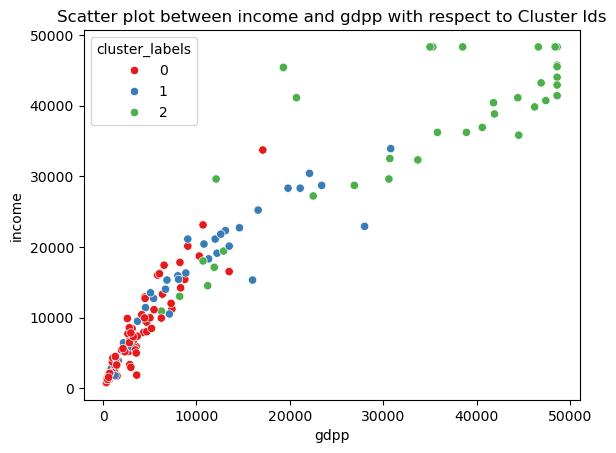

In [190]:
#scatter plot between income and gdpp with respect to Cluster Ids
sns.scatterplot(x='gdpp',y='income',hue='cluster_labels',data=country_df_hierarchy,palette='Set1')
plt.title("Scatter plot between income and gdpp with respect to Cluster Ids")
plt.show()

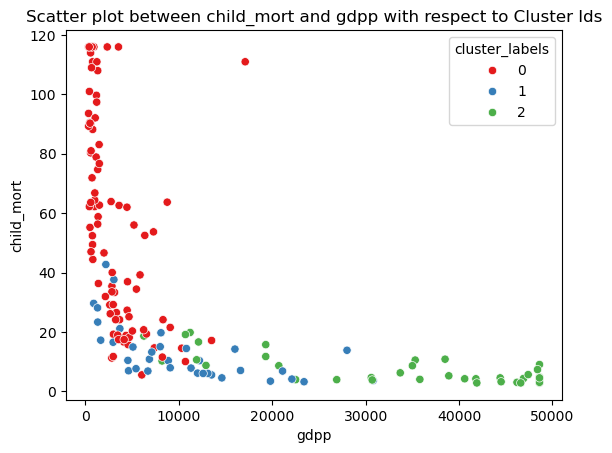

In [191]:
#scatter plot between child_mort and gdpp with respect to Cluster Ids
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_labels',data=country_df_hierarchy,palette='Set1')
plt.title("Scatter plot between child_mort and gdpp with respect to Cluster Ids")
plt.show()

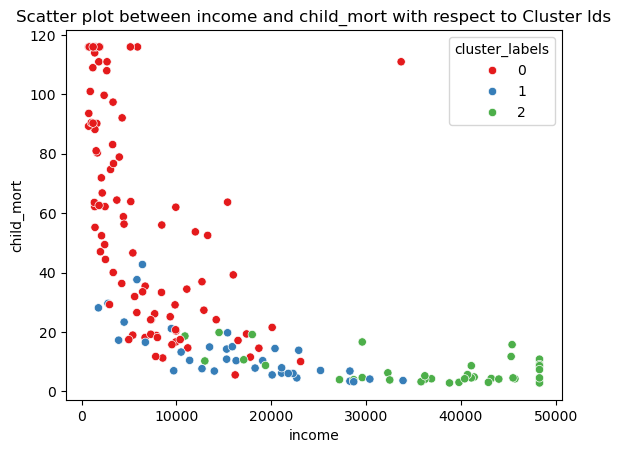

In [192]:
#scatter plot between income and child_mort with respect to Cluster Ids
sns.scatterplot(x='income',y='child_mort',hue='cluster_labels',data=country_df_hierarchy,palette='Set1')
plt.title("Scatter plot between income and child_mort with respect to Cluster Ids")
plt.show()

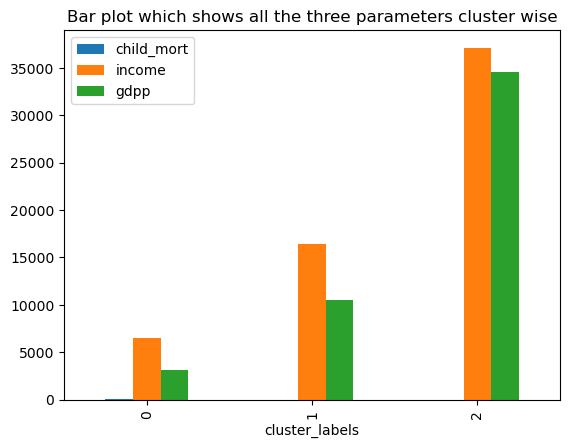

In [193]:
#Bar plot which shows all the three parameters cluster wise
country_df_hierarchy.drop(['country','exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')
plt.title("Bar plot which shows all the three parameters cluster wise")
plt.show()

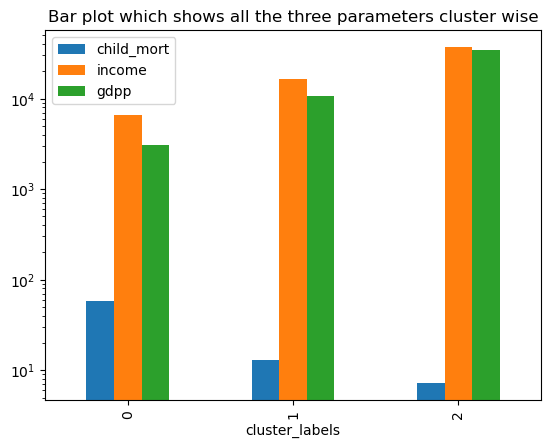

In [194]:
#Bar plot which shows all the three paramters cluster wise using log scale to makechild mortality values more evident.
country_df_hierarchy.drop(['country','exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')
plt.title("Bar plot which shows all the three parameters cluster wise")
plt.yscale("log")
plt.show()

##### Observation:

##### Cluster 0: High Child mortality rate, less gdpp and income : Under developed countries. Which we need to target
##### Cluster 1: Medium child mortality rate, gdpp and income : Developing countries.
##### Cluster 2: Less Child mortality rate, high gdpp and income : Developed countries.

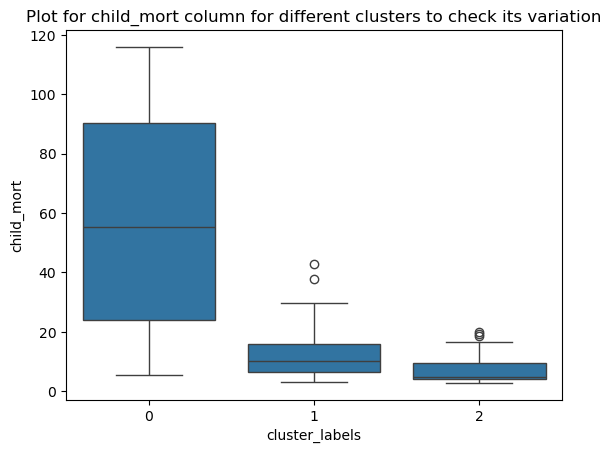

In [195]:
# plot for child_mort column for different clusters to check its variation
sns.boxplot(x='cluster_labels', y='child_mort', data=country_df_hierarchy)
plt.title("Plot for child_mort column for different clusters to check its variation")
plt.show()

##### Observation: The cluster 2 has countries with less child mortality and cluster 0 has countries with high child mortality.

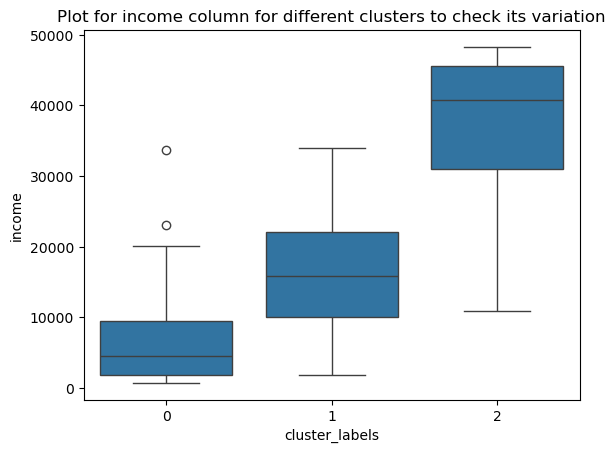

In [196]:
# plot for income column for different clusters to check its variation
sns.boxplot(x='cluster_labels', y='income', data=country_df_hierarchy)
plt.title("Plot for income column for different clusters to check its variation")
plt.show()

##### Observation: The cluster 0 has countries with less income and cluster 2 has countries with high income.

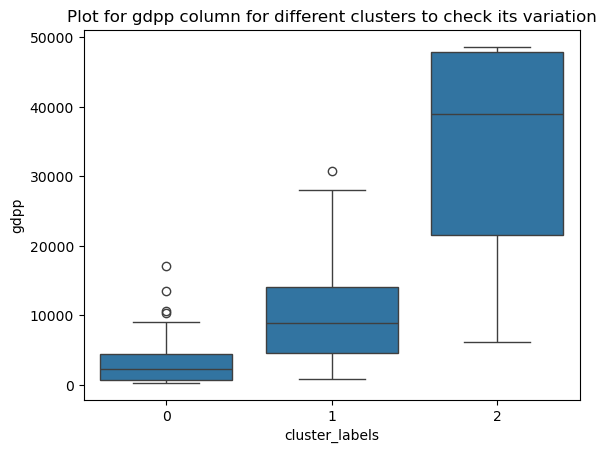

In [197]:
# plot for gdpp column for different clusters to check its variation
sns.boxplot(x='cluster_labels', y='gdpp', data=country_df_hierarchy)
plt.title("Plot for gdpp column for different clusters to check its variation")
plt.show()

##### Observation: The cluster 0 has countries with less gdpp and cluster 2 has countries with high gdpp.

##### Overall Observations:
##### Clusters 0 denotes of under developed countries
##### Clusters 1 denotes of developing countries
##### Clusters 2 denotes of developed countries

##### We need to target countries of Cluster 0 The countries which need AID .

In [198]:
#Countries under Cluster 0 ie. which have less gdpp, less income and high child mortality
country_df_hierarchy[country_df_hierarchy['cluster_labels'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0,0
3,Angola,116.0,62.3,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0,0
5,Argentina,14.5,18.9,8.10,16.0,18700.0,20.87,75.8,2.370,10300.0,0
...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.340,1380.0,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.500,2970.0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,20.87,75.4,2.470,13500.0,0
165,Yemen,56.3,30.0,5.18,34.4,4480.0,20.87,67.5,4.670,1310.0,0


In [199]:
country_df_hierarchy.country[country_df_hierarchy['cluster_labels'] == 0]

0      Afghanistan
1          Albania
2          Algeria
3           Angola
5        Argentina
          ...     
161     Uzbekistan
162        Vanuatu
163      Venezuela
165          Yemen
166         Zambia
Name: country, Length: 93, dtype: object

##### The above is the list of countries which come under cluster 0. The countries which need AID .
##### There are 93 countries in this category.

In [200]:
#Countries under Cluster 1 ie. which have medium gdpp, medium income and medium child mortality
country_df_hierarchy[country_df_hierarchy['cluster_labels'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
4,Antigua and Barbuda,10.3,45.50,6.03,58.90,19100.0,1.4400,76.8,2.1300,12200.0,1
10,Bahamas,13.8,35.00,7.89,43.70,22900.0,-0.3930,73.8,1.8600,28000.0,1
13,Barbados,14.2,39.50,7.97,48.70,15300.0,0.3210,76.7,1.7800,16000.0,1
18,Bhutan,42.7,42.50,5.20,70.70,6420.0,5.9900,72.1,2.3800,2180.0,1
20,Bosnia and Herzegovina,6.9,29.70,11.10,51.30,9720.0,1.4000,76.8,1.3100,4610.0,1
24,Bulgaria,10.8,50.20,6.87,53.00,15300.0,1.1100,73.9,1.5700,6840.0,1
41,Croatia,5.5,37.60,7.76,38.10,20100.0,0.8210,76.3,1.5500,13500.0,1
42,Cyprus,3.6,50.20,5.97,57.50,33900.0,2.0100,79.9,1.4200,30800.0,1
43,Czech Republic,3.4,66.00,7.88,62.90,28300.0,-1.4300,77.5,1.5100,19800.0,1
51,Estonia,4.5,75.10,6.03,68.70,22700.0,1.7400,76.0,1.7200,14600.0,1


In [201]:
#Countries under Cluster 2 ie. which have high gdpp, high income and low child mortality
country_df_hierarchy[country_df_hierarchy['cluster_labels'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
7,Australia,4.8,19.80,8.7300,20.900,41400.0,1.1600,81.4,1.9300,48610.0,2
8,Austria,4.3,51.30,11.0000,47.800,43200.0,0.8730,80.5,1.4400,46900.0,2
11,Bahrain,8.6,69.50,4.9700,50.900,41100.0,7.4400,76.0,2.1600,20700.0,2
15,Belgium,4.5,76.40,10.7000,74.700,41100.0,1.8800,80.0,1.8600,44400.0,2
22,Brazil,19.8,10.70,9.0100,12.988,14500.0,8.4100,74.2,1.8000,11200.0,2
23,Brunei,10.5,67.40,2.8400,28.000,48290.0,16.7000,77.1,1.8400,35300.0,2
29,Canada,5.6,29.10,11.3000,31.000,40700.0,2.8700,81.3,1.6300,47400.0,2
33,Chile,8.7,37.70,7.9600,31.300,19400.0,8.9600,79.1,1.8800,12900.0,2
35,Colombia,18.6,15.90,7.5900,17.800,10900.0,3.8600,76.4,2.0100,6250.0,2
39,Costa Rica,10.2,33.20,10.9000,35.000,13000.0,6.5700,80.4,1.9200,8200.0,2


In [202]:
#Get the top 5 countires that are in dire need to HELP #Get the top 5 countires that are in dire need to HELP - When Gdpp, Income and Child mortality is the order of preference.)
country_df_hierarchy[country_df_hierarchy['cluster_labels'] == 0].sort_values(by = ['gdpp','income','child_mort'], ascending = [True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
88,Liberia,89.3,19.10,11.57,81.14,742.24,5.47,60.8,5.020,331.62,0
26,Burundi,93.6,8.92,11.57,39.20,764.00,12.30,57.7,5.861,331.62,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.60,742.24,20.80,57.5,5.861,334.00,0
112,Niger,116.0,22.20,5.16,49.10,814.00,2.55,58.8,5.861,348.00,0
132,Sierra Leone,116.0,16.80,11.57,34.50,1220.00,17.20,55.0,5.200,399.00,0


In [203]:
#Get the top 5 countires that are in dire need to HELP - When 'income','gdpp','child_mort is the order of preference)
country_df_hierarchy[country_df_hierarchy['cluster_labels'] == 0].sort_values(by = ['income','gdpp','child_mort'], ascending = [True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
88,Liberia,89.3,19.10,11.57,81.14,742.24,5.47,60.8,5.020,331.62,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.60,742.24,20.80,57.5,5.861,334.00,0
26,Burundi,93.6,8.92,11.57,39.20,764.00,12.30,57.7,5.861,331.62,0
112,Niger,116.0,22.20,5.16,49.10,814.00,2.55,58.8,5.861,348.00,0
31,Central African Republic,116.0,11.80,3.98,26.50,888.00,2.01,47.5,5.210,446.00,0


In [204]:
#Get the top 5 countires that are in dire need to HELP - When 'child_mort','income','gdpp' is the order of preference)
country_df_hierarchy[country_df_hierarchy['cluster_labels'] == 0].sort_values(by = ['child_mort','income','gdpp'], ascending = [False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,742.24,20.80,57.5,5.861,334.0,0
112,Niger,116.0,22.2,5.16,49.1,814.00,2.55,58.8,5.861,348.0,0
31,Central African Republic,116.0,11.8,3.98,26.5,888.00,2.01,47.5,5.210,446.0,0
132,Sierra Leone,116.0,16.8,11.57,34.5,1220.00,17.20,55.0,5.200,399.0,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430.00,6.81,57.9,5.861,575.0,0


##### Inference:

##### Less gdpp,less income and high child mortality parameters are considered.

##### Five countries which are in direst need of aid - Burundi, Liberia ,Congo. Dem. Rep , Niger , Sierra Leone (When Gdpp, Income and Child mortality is the order of preference.)
##### Five countries which are in direst need of aid - Congo. Dem. Rep, Liberia ,Burundi, Niger , Central African Republic (When 'income','gdpp','child_mort is the order of preference)
##### Five countries which are in direst need of aid - Haiti, Sierra Leone ,Chad, Central African Republic ,Mali (When 'child_mort','income','gdpp' is the order of preference)